In [1]:
# Step 1: Load the Car Dataset (Avi-style)
import pandas as pd

# I am naming this creatively to reflect the project I am personally working on
file_path = '/Users/avinash/Desktop/JupyterPractice/cleaned_v4_filtered.csv'
car_data_raw = pd.read_csv(file_path)

# Peek at the data – this is my starting point
car_data_raw.head()


,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,...,Engine,Max Power,Max Torque,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity,Car_Age
0,Honda,Amaze 1.2 VX i-VTEC,505000,2017,87150,Petrol,Manual,Pune,Grey,First,...,1198 cc,87 bhp @ 6000 rpm,109 Nm @ 4500 rpm,FWD,3990.0,1680.0,1505.0,5.0,35.0,8
1,Maruti Suzuki,Swift DZire VDI,450000,2014,75000,Diesel,Manual,Ludhiana,White,Second,...,1248 cc,74 bhp @ 4000 rpm,190 Nm @ 2000 rpm,FWD,3995.0,1695.0,1555.0,5.0,42.0,11
2,Hyundai,i10 Magna 1.2 Kappa2,220000,2011,67000,Petrol,Manual,Lucknow,Maroon,First,...,1197 cc,79 bhp @ 6000 rpm,112.7619 Nm @ 4000 rpm,FWD,3585.0,1595.0,1550.0,5.0,35.0,14
3,Toyota,Glanza G,799000,2019,37500,Petrol,Manual,Mangalore,Red,First,...,1197 cc,82 bhp @ 6000 rpm,113 Nm @ 4200 rpm,FWD,3995.0,1745.0,1510.0,5.0,37.0,6
4,Toyota,Innova 2.4 VX 7 STR [2016-2020],1950000,2018,69000,Diesel,Manual,Mumbai,Grey,First,...,2393 cc,148 bhp @ 3400 rpm,343 Nm @ 1400 rpm,RWD,4735.0,1830.0,1795.0,7.0,55.0,7


In [2]:
#Prepare Car Data for ML

#Only numeric attributes matter for tree models
numeric_car_specs = car_data_raw.select_dtypes(include='number')

#Removing records with incomplete values
car_data_ready = numeric_car_specs.dropna()

#Target Price, Features, everything
vehicle_features = car_data_ready.drop(columns=['Price'])
price_target = car_data_ready['Price']

#Split data to create testing environment
from sklearn.model_selection import train_test_split

carX_train, carX_test, price_train, price_test = train_test_split(
    vehicle_features, price_target, test_size=0.2, random_state=42
)

print("Training features shape:", carX_train.shape)
print("Testing features shape :", carX_test.shape)


Training features shape: (1442, 8)
Testing features shape : (361, 8)


Random Forest Results
RMSE: ₹241,946
R² Score: 0.9488


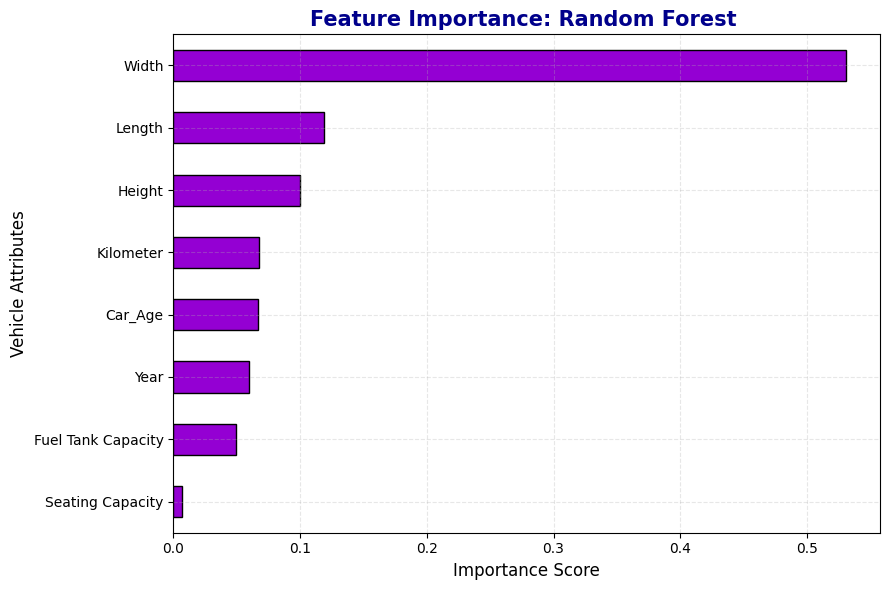

In [6]:
#Train Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

forest_of_prices = RandomForestRegressor(n_estimators=100, random_state=42)
forest_of_prices.fit(carX_train, price_train)

#Predict
price_predictions_forest = forest_of_prices.predict(carX_test)

#Evaluation
forest_rmse = np.sqrt(mean_squared_error(price_test, price_predictions_forest))
forest_r2 = r2_score(price_test, price_predictions_forest)

print("Random Forest Results")
print(f"RMSE: ₹{int(forest_rmse):,}")
print(f"R² Score: {forest_r2:.4f}")

#Feature Importance Visualization
feature_importance = pd.Series(forest_of_prices.feature_importances_, index=vehicle_features.columns)
feature_importance_sorted = feature_importance.sort_values(ascending=True)

#Plot
plt.figure(figsize=(9,6))
feature_importance_sorted.plot(kind='barh', color='darkviolet', edgecolor='black')
plt.title("Feature Importance: Random Forest ", fontsize=15, color='darkblue', weight='bold')
plt.xlabel("Importance Score", fontsize=12)
plt.ylabel("Vehicle Attributes", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()


⚡ XGBoost Model Results
RMSE: ₹251,219
R² Score: 0.9448


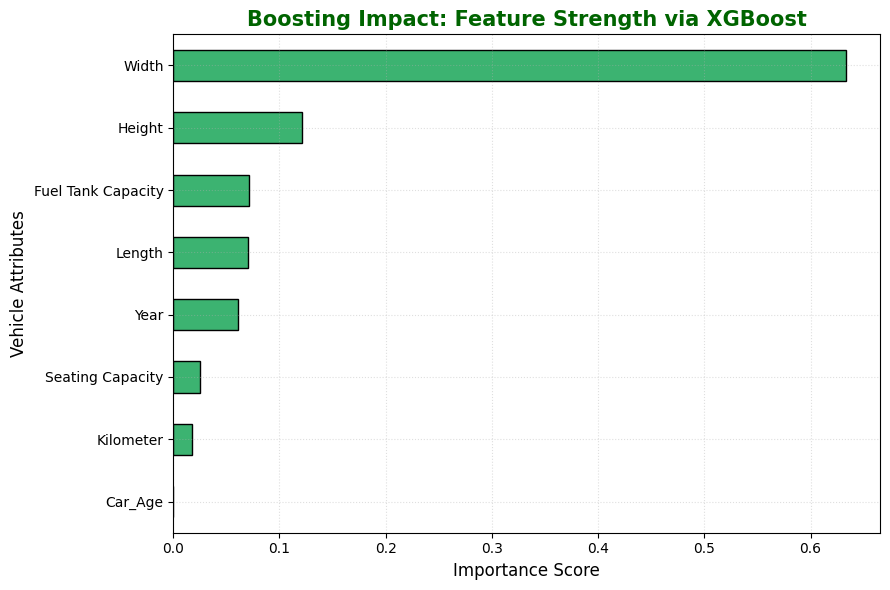

In [8]:
#Train XGBoost Regressor

from xgboost import XGBRegressor

#boosting model
xboost_model = XGBRegressor(n_estimators=100, random_state=42)
xboost_model.fit(carX_train, price_train)

#Predict using test data
price_predictions_boost = xboost_model.predict(carX_test)

#Evaluate model
boost_rmse = np.sqrt(mean_squared_error(price_test, price_predictions_boost))
boost_r2 = r2_score(price_test, price_predictions_boost)

print("XGBoost Model Results")
print(f"RMSE: ₹{int(boost_rmse):,}")
print(f"R² Score: {boost_r2:.4f}")

#Feature importances for XGBoost
boost_importance = pd.Series(xboost_model.feature_importances_, index=vehicle_features.columns)
boost_sorted = boost_importance.sort_values(ascending=True)

#Visualize Boosting impact
plt.figure(figsize=(9,6))
boost_sorted.plot(kind='barh', color='mediumseagreen', edgecolor='black')
plt.title("Boosting Impact: Feature Strength via XGBoost", fontsize=15, color='darkgreen', weight='bold')
plt.xlabel("Importance Score", fontsize=12)
plt.ylabel("Vehicle Attributes", fontsize=12)
plt.grid(True, linestyle=':', alpha=0.4)
plt.tight_layout()
plt.show()


🔎 SHAP Breakdown: Random Forest


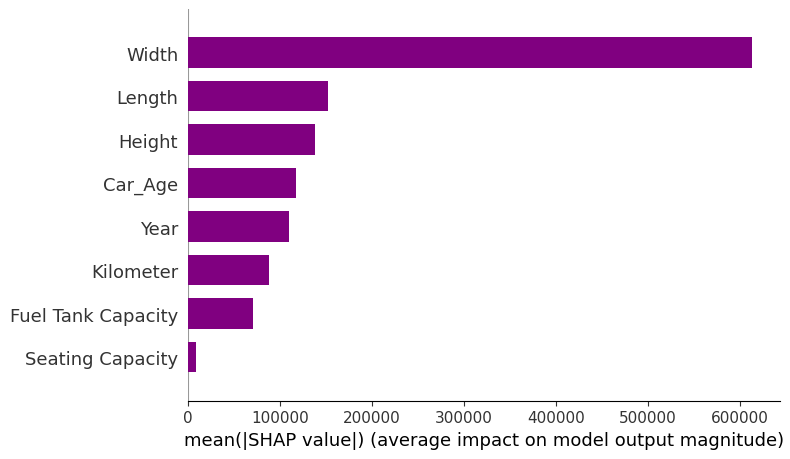

⚡ SHAP Breakdown: XGBoost


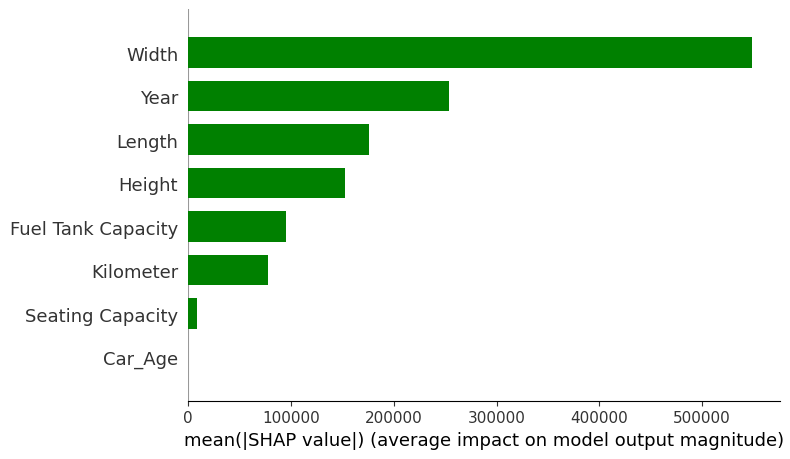

In [9]:
#SHAP Insights

import shap
import matplotlib.pyplot as plt
shap.initjs()

#Random Forest
shap_engine_forest = shap.TreeExplainer(forest_of_prices)
forest_shap_values = shap_engine_forest.shap_values(carX_test)

#SHAP Plot Random Forest
print("SHAP Breakdown: Random Forest")
shap.summary_plot(
    forest_shap_values, carX_test,
    plot_type="bar",
    color="purple"
)
#XGBoost
shap_engine_boost = shap.TreeExplainer(xboost_model)
boost_shap_values = shap_engine_boost.shap_values(carX_test)

#SHAP Plot XGBoost
print("SHAP Breakdown: XGBoost")
shap.summary_plot(
    boost_shap_values, carX_test,
    plot_type="bar",
    color="green"
)


PDP: Random Forest – How Width influences Price


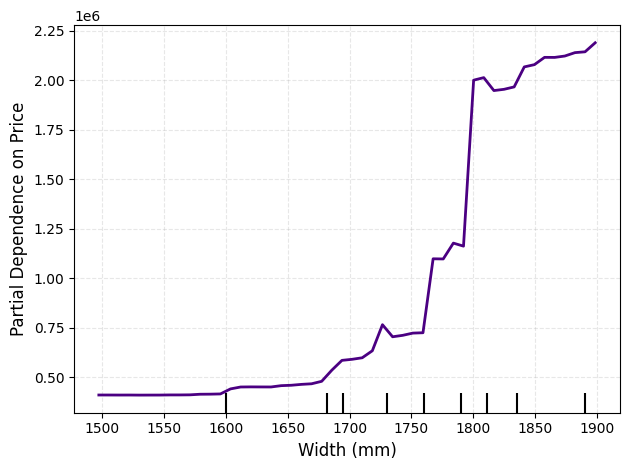

PDP: XGBoost – How Width influences Price


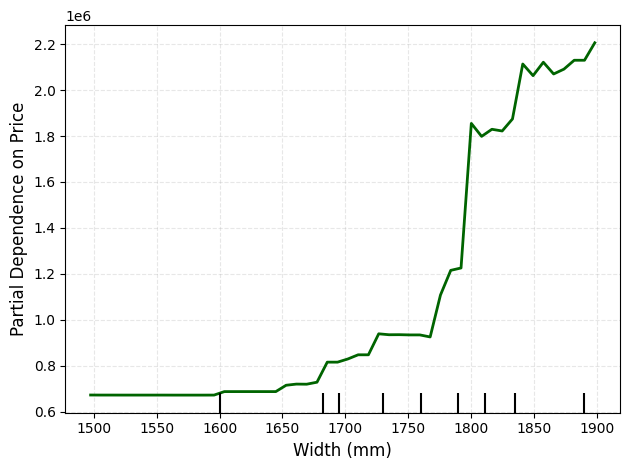

In [13]:
#Partial Dependence Plot (PDP)

from sklearn.inspection import PartialDependenceDisplay

#PDP for Random Forest
print("PDP: Random Forest – How Width influences Price")
PartialDependenceDisplay.from_estimator(
    forest_of_prices, carX_test, ['Width'],
    kind='average', grid_resolution=50,
    line_kw={'color': 'indigo', 'linewidth': 2},
)
plt.xlabel("Width (mm)", fontsize=12)
plt.ylabel("Partial Dependence on Price", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

#PDP for XGBoost
print("PDP: XGBoost – How Width influences Price")
PartialDependenceDisplay.from_estimator(
    xboost_model, carX_test, ['Width'],
    kind='average', grid_resolution=50,
    line_kw={'color': 'darkgreen', 'linewidth': 2},
)
plt.xlabel("Width (mm)", fontsize=12)
plt.ylabel("Partial Dependence on Price", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()
